In [89]:
import pandas as pd
import math
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt 
from scipy.optimize import lsq_linear

In [20]:
ss = np.loadtxt("sunspot.txt" )

In [21]:
ss.shape

(266, 13)

In [22]:
ss = np.delete(ss, 0, axis=1) # Delete years

In [23]:
ss.shape

(266, 12)

In [24]:
ss = np.reshape(ss, ss.shape[0] * ss.shape[1])

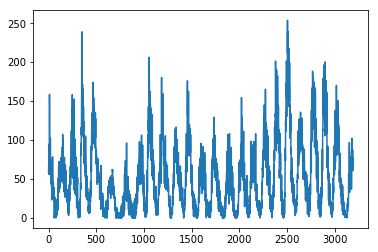

In [121]:
plt.plot(ss)
plt.show()

In [122]:
TEST_SIZE = 12 * 5 # 12 months for 5 years
K = 20 # num o variables
TRAIN_SIZE = ss.shape[0] - TEST_SIZE


ss_train = ss[:TRAIN_SIZE]
ss_test = ss[TRAIN_SIZE:]

assert ss_test.shape[0] == TEST_SIZE, "Something went wrong with train/test split!"

In [155]:
Phi = np.array([])

# Phi
for i in range(len(ss_train) - K):
    Phi = np.append(Phi, 1)
    for j in range(K - 2, -1, -1):
        Phi = np.append(Phi, ss_train[i + j])

In [156]:
y_train = ss_train[K:]
y_test = ss_test # This is a very good question. Will we use training data to predict test data ? Data leakage
Phi = Phi.reshape(int(Phi.shape[0] / K), K)

assert y_train.shape[0] == Phi.shape[0], "Matrix lenght does not match for multiplication!" 

In [157]:
y_train.shape

(3112,)

In [158]:
np.dot(Phi, Phi.transpose()).shape

(3112, 3112)

In [159]:
pred = np.dot(np.dot(linalg.inv(np.dot(Phi.transpose(),Phi)), Phi.transpose()), y) 
pred

array([ 5.16127726,  0.38916807,  0.1545605 ,  0.14181681,  0.08668982,
        0.08367843,  0.03444064,  0.0291109 ,  0.11038795,  0.07249905,
        0.03726148,  0.01715158, -0.02816499,  0.01106781,  0.02632458,
       -0.04033188, -0.02866873, -0.07561765, -0.05000747, -0.07152691])

In [160]:
################ End of training ################

In [161]:
################      RMSE_1    ################

In [162]:
# Whole matrix (train and test)
Phi_tot = np.array([])

for i in range(len(ss) - K):
    Phi_tot = np.append(Phi_tot, 1)
    for j in range(K - 2, -1, -1):
        Phi_tot = np.append(Phi_tot, ss[i + j])
Phi_tot = Phi_tot.reshape(int(Phi_tot.shape[0] / K), K)
Phi_tot.shape

(3172, 20)

In [138]:
math.sqrt(np.mean(np.power(np.dot(Phi_tot,pred.T) - ss[K:], 2)))

346.1633209434049

In [139]:
################      RMSE_2    ################

In [163]:
Phi_tst = np.array([])

for i in range(len(ss_test) - K):
    Phi_tst = np.append(Phi_tst, 1)
    for j in range(K - 2, -1, -1):
        Phi_tst = np.append(Phi_tst, ss_test[i + j])
Phi_tst = Phi_tst.reshape(int(Phi_tst.shape[0] / K), K)

In [154]:
rmse = []
rmse.append(math.sqrt(np.mean(np.power(np.dot(Phi_tst,pred.T) - ss_test[K:], 2))))
rmse.append(math.sqrt(np.mean(np.power(np.dot(Phi,pred.T) - ss_train[K:], 2))))

rmse

[355.4924485195804, 17.49368818023439]